In [13]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from asaplib.data import ASAPXYZ
#from asaplib.reducedim import PCA
from asaplib.plot import *

In [8]:
fxyz = 'H2O-n6-l6-c6.0-g0.3-pca-d10.xyz'
fmat = 'pca_coord'

In [9]:
asapxyz = ASAPXYZ(fxyz)

load xyz file:  H2O-n6-l6-c6.0-g0.3-pca-d10.xyz , a total of  1054 frames , a total of  194847 atoms , with elements:  [1, 8] .


In [21]:
dm, _ = asapxyz.get_descriptors(fmat, False)
dm_hydrogen = asapxyz.get_atomic_descriptors(fmat, 1)
dm_oxygen = asapxyz.get_atomic_descriptors(fmat, 8)

Find the following descriptor names that match the specifications:  ['pca_coord']
Use global descriptor matrix with shape:  (1054, 10)
Find the following atomic descriptor names that match the specifications:  ['pca_coord']
Use atomic descriptor matrix with shape:  (129898, 10)
Find the following atomic descriptor names that match the specifications:  ['pca_coord']
Use atomic descriptor matrix with shape:  (64949, 10)


/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/asaplib-0.0.1-py3.7.egg/asaplib/data/xyz.py:360: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [22]:
plotcolor_volume, _, _, _ = set_color_function('volume', asapxyz)
plotcolor_density = np.zeros(len(plotcolor_volume))
for i in range(len(plotcolor_volume)):
    plotcolor_density[i] = 29.889703/plotcolor_volume[i]/3.

In [17]:
tags = np.loadtxt('ice-54-labels.dat', dtype="str")[:,0]

In [28]:
iceornot_hydrogen, _, _, _ = set_color_function('ice-or-not.tag', asapxyz, 0, 0, False, True, 1, False)
iceornot_oxygen, _, _, _ = set_color_function('ice-or-not.tag', asapxyz, 0, 0, False, True, 8, False)

load file: ice-or-not.tag for color schemes
load file: ice-or-not.tag for color schemes


In [10]:
pc = [0, 1]
pca_d = len(pc)

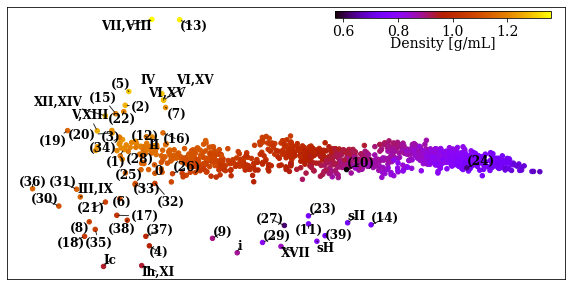

In [82]:
# make plot
prefix = 'selected_phases'
fcolor = 'density'
plot_styles.set_nice_font()
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

cset1 = ax.scatter(dm[::-1, pc[0]],dm[::-1, pc[1]], c=plotcolor_density[::-1], 
           cmap='gnuplot', s=20, alpha=1.0, rasterized=True, label=None,
                                   vmax=None, vmin=None)

cbaxes = fig.add_axes([0.58, 0.85, 0.30, 0.02])
cbar=fig.colorbar(cset1, cax=cbaxes, orientation='horizontal')
cbar.ax.set_xlabel('Density [g/mL]',labelpad=-2,  size=14)
cbar.ax.tick_params(labelsize=14) 

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(
    axis='x',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.tick_params(
    axis='y',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off


#ax.set_xlim([-4.5,3])
#ax.set_ylim([-10.5,5.5])

adtext = True
if len(tags) > 0:
    texts = []
    for i in range(len(tags)):
        #ax.scatter(proj[i, 0], proj[i, 1], marker='^', c='black')
        if tags[i] != "None":
            #ax.scatter(proj[i, 0], proj[i, 1], marker='^', c='black')
            texts.append(ax.text(dm[i, pc[0]], dm[i, pc[1]], tags[i],
                                 ha='center', va='center', fontsize=12, color='black', weight='bold'))
    if adtext:
        from adjustText import adjust_text
        adjust_text(texts, on_basemap=True,  # only_move={'points':'', 'text':'x'},
                        expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
                        force_text=(0.03, 0.5), force_points=(0.0, 0.0),
                        ax=ax, precision=0.01,
                        arrowprops=dict(arrowstyle="-", color='black', lw=1, alpha=0.8))

fig.savefig('PCA_4_' + prefix + '-c-' + fcolor + '.png')

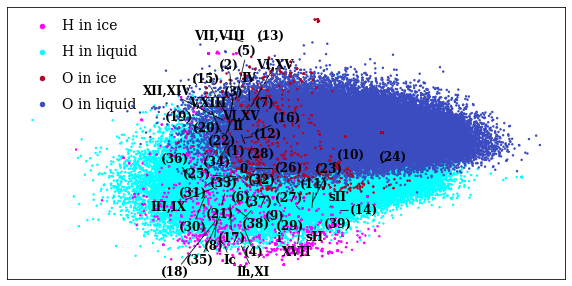

In [83]:
# make plot

plot_styles.set_nice_font()
fig, ax2 = plt.subplots()
fig.set_size_inches(10, 5)

ax2.scatter(dm_hydrogen[::-1, 0], dm_hydrogen[::-1, 1], c=iceornot_hydrogen[::-1], 
           cmap='cool', s=2, alpha=1.0, rasterized=True, label=None,
                                   vmax=1, vmin=0)

ax2.scatter(dm_oxygen[::-1, 0], dm_oxygen[::-1, 1], c=iceornot_oxygen[::-1], 
           cmap='coolwarm', s=2, alpha=1.0, rasterized=True,
                                   vmax=1, vmin=0)

ax2.scatter(-5.9, 10, s=20, c=1,cmap='cool', marker='o',vmax=1, vmin=0)
ax2.text(-5.5, 10, 'H in ice',ha='left', va='center', fontsize=14, color='black')

ax2.scatter(-5.9, 8, s=20, c=0,cmap='cool', marker='o',vmax=1, vmin=0)
ax2.text(-5.5, 8, 'H in liquid',ha='left', va='center', fontsize=14, color='black')

ax2.scatter(-5.9, 6, s=20, c=1,cmap='coolwarm', marker='o',vmax=1, vmin=0)
ax2.text(-5.5, 6, 'O in ice',ha='left', va='center', fontsize=14, color='black')

ax2.scatter(-5.9, 4, s=20, c=0,cmap='coolwarm', marker='o',vmax=1, vmin=0)
ax2.text(-5.5, 4, 'O in liquid',ha='left', va='center', fontsize=14, color='black')

#ax2.set_xlim([])
#ax2.set_ylim([])

ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax2.tick_params(
    axis='x',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax2.tick_params(
    axis='y',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

adtext = True
if len(tags) > 0:
    texts = []
    for i in range(len(tags)):
        #ax2.scatter(proj[i, 0], proj[i, 1], marker='^', c='black')
        if tags[i] != "None":
            #ax2.scatter(proj[i, 0], proj[i, 1], marker='^', c='black')
            texts.append(ax2.text(dm[i, 0], dm[i, 1], tags[i],
                                 ha='center', va='center', fontsize=12, color='black', weight='bold'))
    if adtext:
        from adjustText import adjust_text
        adjust_text(texts, on_basemap=True,  # only_move={'points':'', 'text':'x'},
                        expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
                        force_text=(0.03, 0.5), force_points=(0.0, 0.0),
                        ax=ax2, precision=0.01,
                        arrowprops=dict(arrowstyle="-", color='black', lw=1, alpha=0.8))

fig.savefig('PCA_4_' + prefix + '-c-' + fcolor + '.png')

/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


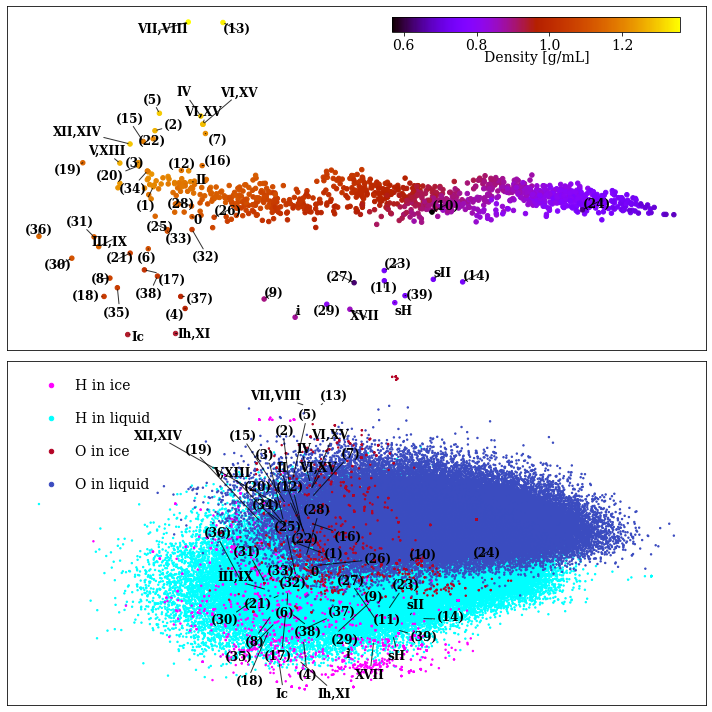

In [80]:
fig, (ax,ax2) = plt.subplots(2,1)
fig.set_size_inches(10, 10)

cset1 = ax.scatter(dm[::-1, pc[0]],dm[::-1, pc[1]], c=plotcolor_density[::-1], 
           cmap='gnuplot', s=20, alpha=1.0, rasterized=True, label=None,
                                   vmax=None, vmin=None)

cbaxes = fig.add_axes([0.55, 0.95, 0.40, 0.02])
cbar=fig.colorbar(cset1, cax=cbaxes, orientation='horizontal')
cbar.ax.set_xlabel('Density [g/mL]',labelpad=-2,  size=14)
cbar.ax.tick_params(labelsize=14) 

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(
    axis='x',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.tick_params(
    axis='y',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off


#ax.set_xlim([-4.5,3])
#ax.set_ylim([-10.5,5.5])

adtext = True
if len(tags) > 0:
    texts = []
    for i in range(len(tags)):
        #ax.scatter(proj[i, 0], proj[i, 1], marker='^', c='black')
        if tags[i] != "None":
            #ax.scatter(proj[i, 0], proj[i, 1], marker='^', c='black')
            texts.append(ax.text(dm[i, pc[0]], dm[i, pc[1]], tags[i],
                                 ha='center', va='center', fontsize=12, color='black', weight='bold'))
    if adtext:
        from adjustText import adjust_text
        adjust_text(texts, on_basemap=True,  # only_move={'points':'', 'text':'x'},
                        expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
                        force_text=(0.03, 0.5), force_points=(0.0, 0.0),
                        ax=ax, precision=0.01,
                        arrowprops=dict(arrowstyle="-", color='black', lw=1, alpha=0.8))

        

ax2.scatter(dm_hydrogen[::-1, 0], dm_hydrogen[::-1, 1], c=iceornot_hydrogen[::-1], 
           cmap='cool', s=2, alpha=1.0, rasterized=True, label=None,
                                   vmax=1, vmin=0)

ax2.scatter(dm_oxygen[::-1, 0], dm_oxygen[::-1, 1], c=iceornot_oxygen[::-1], 
           cmap='coolwarm', s=2, alpha=1.0, rasterized=True,
                                   vmax=1, vmin=0)

ax2.scatter(-5.9, 10, s=20, c=1,cmap='cool', marker='o',vmax=1, vmin=0)
ax2.text(-5.5, 10, 'H in ice',ha='left', va='center', fontsize=14, color='black')

ax2.scatter(-5.9, 8, s=20, c=0,cmap='cool', marker='o',vmax=1, vmin=0)
ax2.text(-5.5, 8, 'H in liquid',ha='left', va='center', fontsize=14, color='black')

ax2.scatter(-5.9, 6, s=20, c=1,cmap='coolwarm', marker='o',vmax=1, vmin=0)
ax2.text(-5.5, 6, 'O in ice',ha='left', va='center', fontsize=14, color='black')

ax2.scatter(-5.9, 4, s=20, c=0,cmap='coolwarm', marker='o',vmax=1, vmin=0)
ax2.text(-5.5, 4, 'O in liquid',ha='left', va='center', fontsize=14, color='black')

#ax2.set_xlim([])
#ax2.set_ylim([])

ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax2.tick_params(
    axis='x',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax2.tick_params(
    axis='y',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

#adtext = False
if len(tags) > 0:
    texts = []
    for i in range(len(tags)):
        #ax2.scatter(proj[i, 0], proj[i, 1], marker='^', c='black')
        if tags[i] != "None":
            #ax2.scatter(proj[i, 0], proj[i, 1], marker='^', c='black')
            texts.append(ax2.text(dm[i, 0], dm[i, 1], tags[i],
                                 ha='center', va='center', fontsize=12, color='black', weight='bold'))
    if adtext:
        from adjustText import adjust_text
        adjust_text(texts, on_basemap=True,  # only_move={'points':'', 'text':'x'},
                        expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
                        force_text=(0.03, 0.5), force_points=(0.0, 0.0),
                        ax=ax2, precision=0.01,
                        arrowprops=dict(arrowstyle="-", color='black', lw=1, alpha=0.8))

plt.tight_layout()
        
fig.savefig('PCA_combined.png')